## Delivery time taken

There are 20 independent columns and 1 dependent columns including (id)
so by this here in this we perform a Simple Linear Regression 

### Independent Columns are :-
    >   ID                           
    >   Delivery_person_ID          
    >   Delivery_person_Age          
    >   Delivery_person_Ratings      
    >   Restaurant_latitude          
    >   Restaurant_longitude         
    >   Delivery_location_latitude   
    >   Delivery_location_longitude  
    >   Order_Date                    
    >   Time_Orderd                  
    >   Time_Order_picked         
    >   Weather_conditions           
    >   Road_traffic_density        
    >   Vehicle_condition           
    >   Type_of_order                
    >   Type_of_vehicle             
    >   multiple_deliveries         
    >   Festival                    
    >   City 

### Dependent Column is :-
    >   Time_taken (min) :- Time taken by the delivery person so we should predict this column

In [348]:
import numpy as np
import pandas as pd

In [349]:
# Data_ingestion step 
df = pd.read_csv("E:\\Working\\complete_task_25_aug\\notebook\\data\\finalTrain.csv")

In [350]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [351]:
df.shape

(45584, 20)

In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [353]:
# EDA PRCESS
df.isna().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

There are many Missing Values inside the columnns

In [354]:
# ID column is not neccessary so we can drop this column

df.drop('ID',axis=1,inplace=True)
df.columns

Index(['Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings',
       'Restaurant_latitude', 'Restaurant_longitude',
       'Delivery_location_latitude', 'Delivery_location_longitude',
       'Order_Date', 'Time_Orderd', 'Time_Order_picked', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken (min)'],
      dtype='object')

In [355]:
# check for Duplicated records 

df.duplicated().sum()

0

In [356]:
# Segregate numerical and categorical columns

numerical_columns = df.columns[df.dtypes !='O']
categorical_columns = df.columns[df.dtypes =='O']

In [357]:
numerical_columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Vehicle_condition',
       'multiple_deliveries', 'Time_taken (min)'],
      dtype='object')

In [358]:
categorical_columns

Index(['Delivery_person_ID', 'Order_Date', 'Time_Orderd', 'Time_Order_picked',
       'Weather_conditions', 'Road_traffic_density', 'Type_of_order',
       'Type_of_vehicle', 'Festival', 'City'],
      dtype='object')

In [359]:
for i in df.columns:
    print("="*45)
    print("column name :-",i)
    print(f"column type :- {df[i].dtypes}")
    print(f"value_counts :- {df[i].nunique()}")
    print(f"missing no :- {df[i].isna().sum()}")

column name :- Delivery_person_ID
column type :- object
value_counts :- 1320
missing no :- 0
column name :- Delivery_person_Age
column type :- float64
value_counts :- 22
missing no :- 1854
column name :- Delivery_person_Ratings
column type :- float64
value_counts :- 28
missing no :- 1908
column name :- Restaurant_latitude
column type :- float64
value_counts :- 657
missing no :- 0
column name :- Restaurant_longitude
column type :- float64
value_counts :- 518
missing no :- 0
column name :- Delivery_location_latitude
column type :- float64
value_counts :- 4373
missing no :- 0
column name :- Delivery_location_longitude
column type :- float64
value_counts :- 4373
missing no :- 0
column name :- Order_Date
column type :- object
value_counts :- 44
missing no :- 0
column name :- Time_Orderd
column type :- object
value_counts :- 176
missing no :- 1731
column name :- Time_Order_picked
column type :- object
value_counts :- 193
missing no :- 0
column name :- Weather_conditions
column type :- object

In [360]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,43730.000000,43676.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,44591.000000,45584.000000
mean,29.566911,4.633774,17.017948,70.229684,17.465480,70.844161,1.023385,0.744635,26.293963
std,5.815064,0.334744,8.185674,22.885575,7.335562,21.120578,0.839055,0.572510,9.384298
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.551440,75.897963,18.633934,76.002574,1.000000,1.000000,26.000000
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


In [361]:
df[categorical_columns].describe()

,Delivery_person_ID,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City
count,45584,45584,43853,45584,44968,44983,45584,45584,45356,44384
unique,1320,44,176,193,6,4,4,4,2,3
top,JAPRES11DEL02,15-03-2022,21:55,21:30,Fog,Low,Snack,motorcycle,No,Metropolitian
freq,67,1192,461,495,7653,15476,11530,26429,44460,34087


In [362]:
df[numerical_columns].describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,43730.000000,43676.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,44591.000000,45584.000000
mean,29.566911,4.633774,17.017948,70.229684,17.465480,70.844161,1.023385,0.744635,26.293963
std,5.815064,0.334744,8.185674,22.885575,7.335562,21.120578,0.839055,0.572510,9.384298
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.551440,75.897963,18.633934,76.002574,1.000000,1.000000,26.000000
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


In [363]:
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


Delivery_person_ID

these column contain a Object data type so sholud convert this column into the numerical column by using tthe target column 

In [364]:
df['Delivery_person_ID'].value_counts()

Delivery_person_ID
JAPRES11DEL02     67
PUNERES01DEL01    67
VADRES11DEL02     66
VADRES08DEL02     66
JAPRES03DEL01     66
                  ..
GOARES01DEL03      7
DEHRES18DEL03      7
KOCRES16DEL03      6
KOLRES09DEL03      6
BHPRES010DEL03     5
Name: count, Length: 1320, dtype: int64

In [365]:
a = df.groupby(['Delivery_person_ID'])['Time_taken (min)'].mean().sort_values().index

In [366]:
b=df.groupby(['Delivery_person_ID'])['Time_taken (min)'].mean().sort_values().values

In [367]:
(dict(zip(a,b)))

{'KOLRES06DEL03': 19.444444444444443,
 'DEHRES20DEL03': 19.6,
 'DEHRES17DEL01': 19.75,
 'KOLRES01DEL03': 19.818181818181817,
 'KNPRES01DEL01': 20.0,
 'BHPRES15DEL03': 20.142857142857142,
 'LUDHRES18DEL02': 20.2,
 'KOLRES14DEL02': 20.615384615384617,
 'GOARES05DEL03': 20.75,
 'KOCRES16DEL03': 21.0,
 'KOCRES04DEL02': 21.23076923076923,
 'AGRRES03DEL02': 21.25,
 'AURGRES20DEL03': 21.5,
 'LUDHRES20DEL03': 21.692307692307693,
 'AGRRES20DEL03': 21.76923076923077,
 'KOCRES11DEL01': 21.8125,
 'KOCRES02DEL02': 21.846153846153847,
 'COIMBRES07DEL03': 21.88372093023256,
 'LUDHRES17DEL01': 21.928571428571427,
 'KNPRES010DEL03': 21.928571428571427,
 'DEHRES02DEL01': 21.928571428571427,
 'GOARES12DEL01': 22.0,
 'GOARES03DEL03': 22.0,
 'KOLRES01DEL02': 22.076923076923077,
 'KOCRES20DEL03': 22.09090909090909,
 'GOARES14DEL01': 22.1,
 'KOLRES15DEL02': 22.153846153846153,
 'KOLRES05DEL02': 22.3,
 'KNPRES07DEL01': 22.307692307692307,
 'AURGRES08DEL03': 22.333333333333332,
 'BHPRES04DEL02': 22.36363636363

In [368]:
df['Delivery_person_ID']=df['Delivery_person_ID'].map(dict(zip(a,b)))

In [369]:
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,19.750000,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,29.384615,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,26.564103,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,22.466667,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,23.538462,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


Delivery_person_Age



There are many NUmbers of missing values so here in this we can replace this by mode of the age values 

In [370]:
df['Delivery_person_Age'].isna().sum()

1854

In [371]:
df['Delivery_person_Age'].unique()

array([36., 21., 23., 34., 24., 29., 35., 33., 25., 31., 37., 27., 32.,
       26., 38., 20., 22., nan, 28., 39., 30., 15., 50.])

In [372]:
df['Delivery_person_Age']=df['Delivery_person_Age'].fillna(df['Delivery_person_Age'].mode())

In [373]:
df['Delivery_person_Age']=df['Delivery_person_Age'].fillna(35.0)

In [374]:
df['Delivery_person_Age'].isna().sum()

0

In [375]:
df['Delivery_person_Age'].mode()

0    35.0
Name: Delivery_person_Age, dtype: float64

In [376]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


Delivery_person_Age




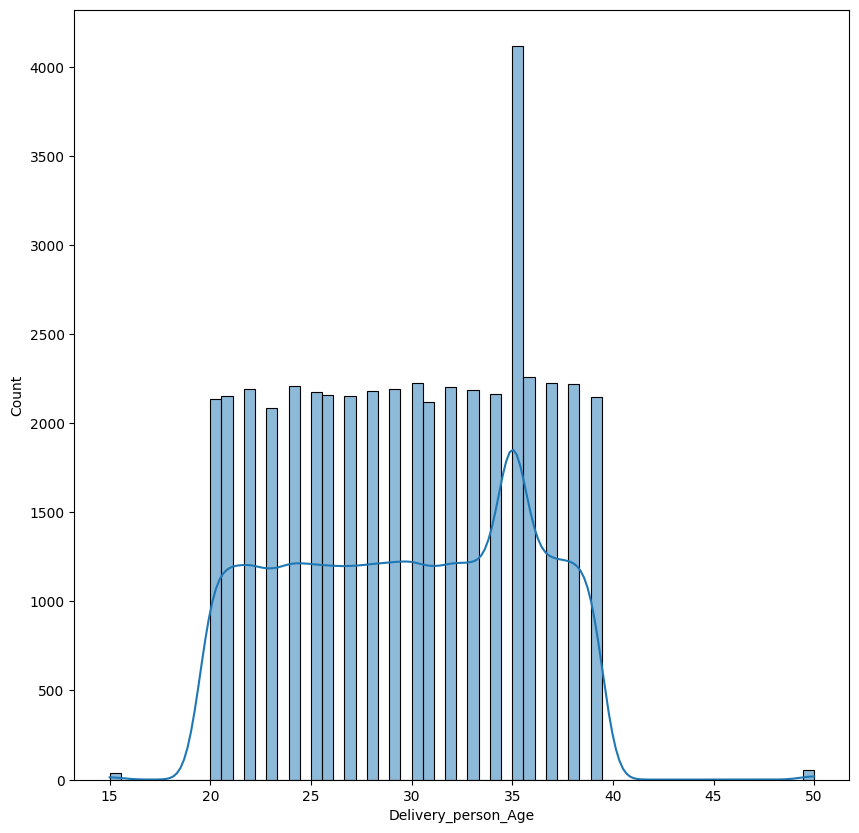

Delivery_person_Ratings




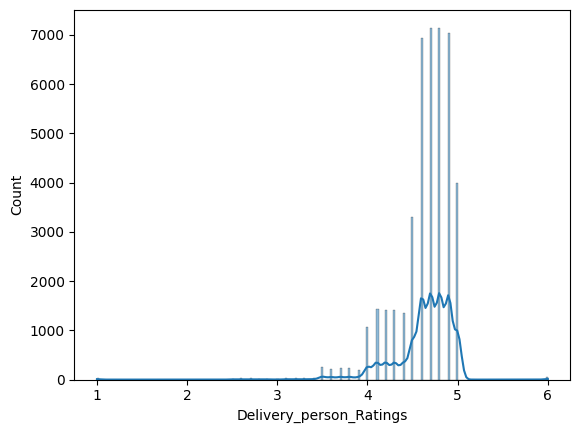

Restaurant_latitude




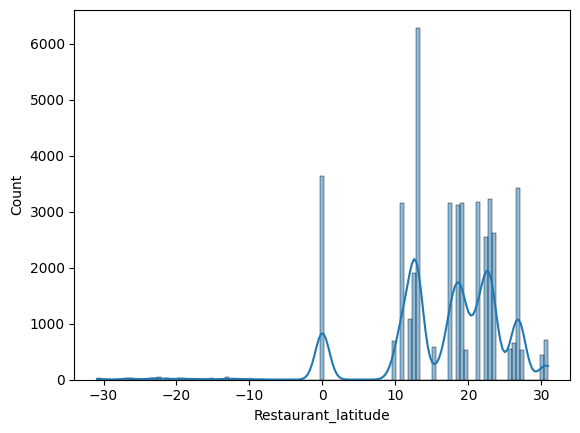

Restaurant_longitude




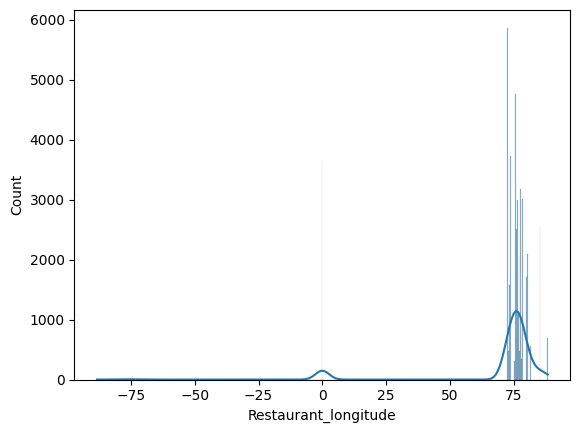

Delivery_location_latitude




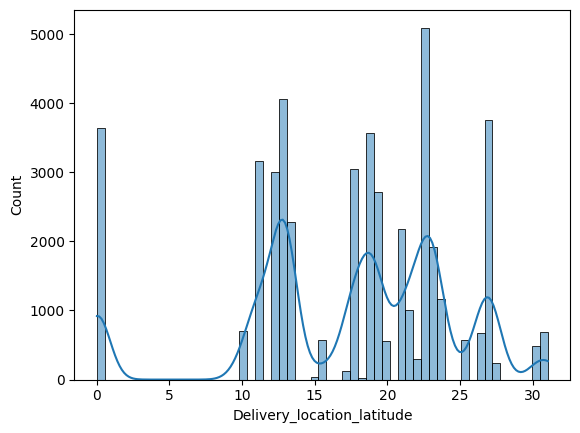

Delivery_location_longitude




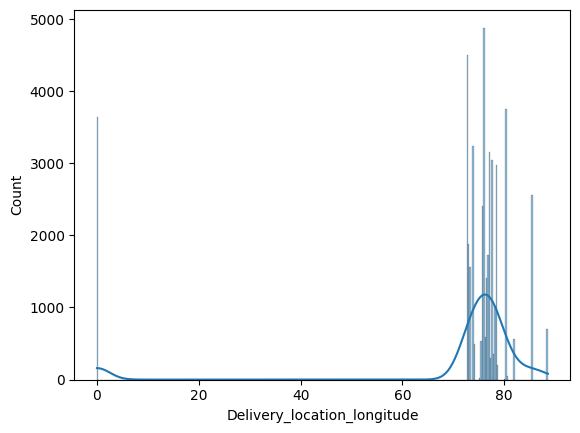

Vehicle_condition




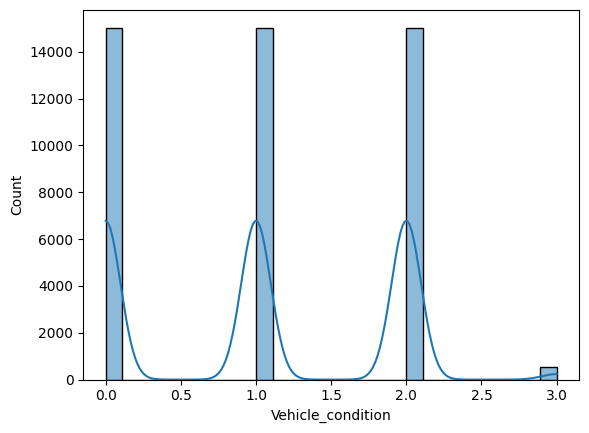

multiple_deliveries




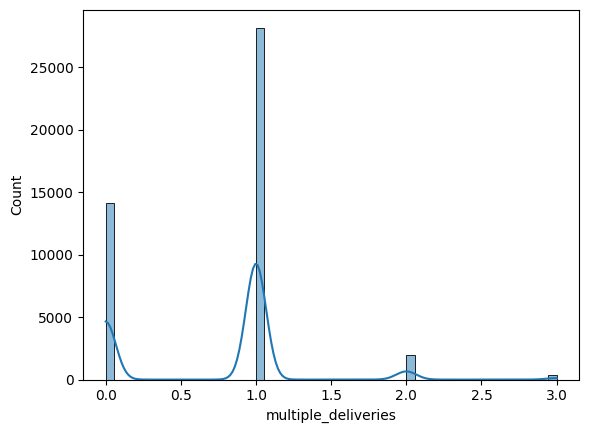

Time_taken (min)




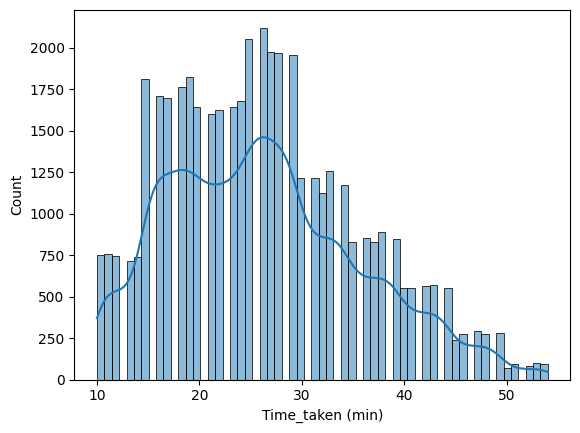

In [102]:
plt.figure(figsize=(10,10))
for i in numerical_columns:
    print(i)
    sns.histplot(data=df,x=i,kde=True)
    #plt.xticks("x-axis")
    #plt.yticks("y-axis")
    print('\n')
    plt.show()

In [377]:
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,19.750000,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,29.384615,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,26.564103,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,22.466667,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,23.538462,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


<Axes: >

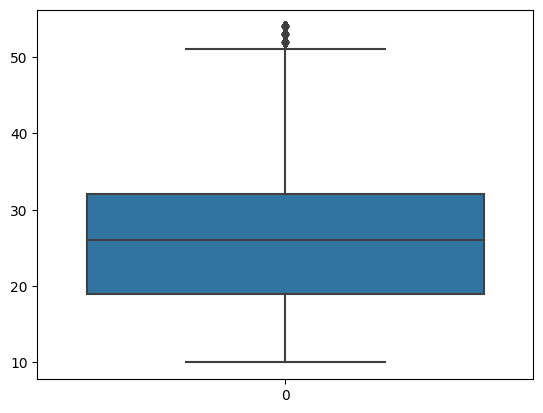

In [110]:

sns.boxplot(df['Time_taken (min)'])

e:\Working\complete_task_25_aug\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


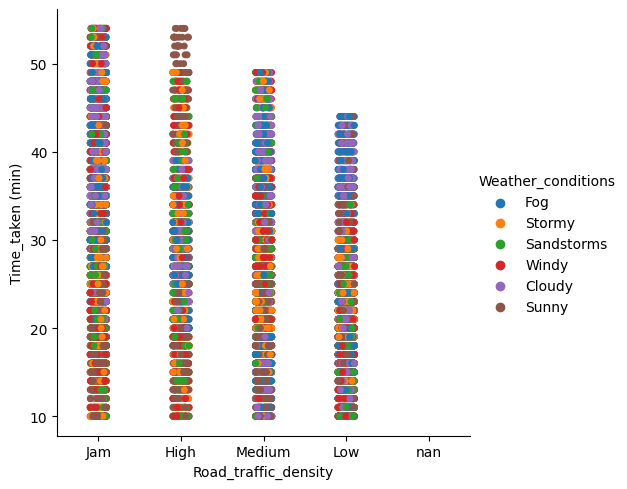

In [114]:
sns.catplot(data=df, x="Road_traffic_density", y="Time_taken (min)",hue='Weather_conditions')

e:\Working\complete_task_25_aug\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


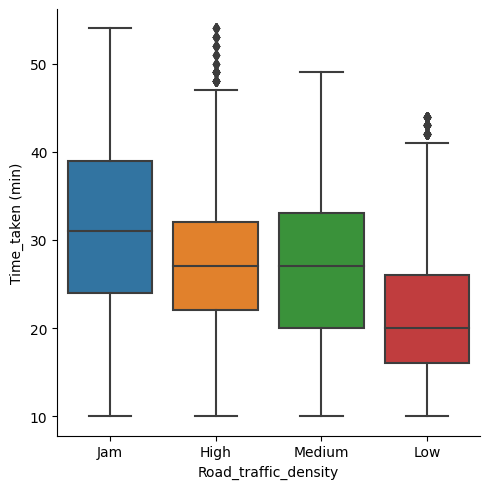

In [115]:
sns.catplot(data=df, x="Road_traffic_density", y="Time_taken (min)", kind="box")

In [378]:
df.columns

Index(['Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings',
       'Restaurant_latitude', 'Restaurant_longitude',
       'Delivery_location_latitude', 'Delivery_location_longitude',
       'Order_Date', 'Time_Orderd', 'Time_Order_picked', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken (min)'],
      dtype='object')

e:\Working\complete_task_25_aug\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


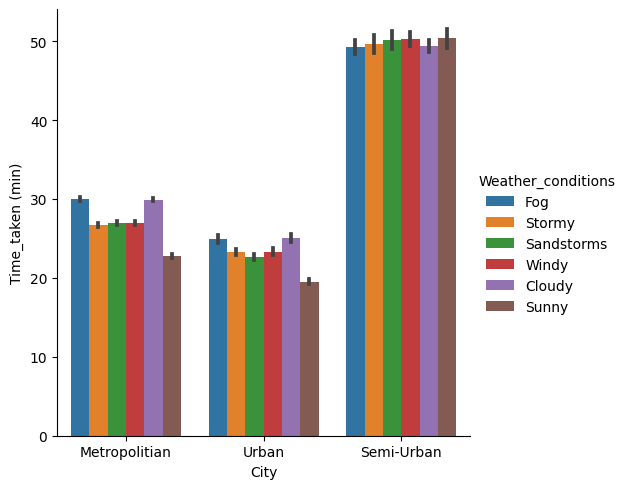

In [124]:
sns.catplot(data=df, x="City", y="Time_taken (min)", hue="Weather_conditions", kind="bar")

In [379]:
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,19.750000,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,29.384615,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,26.564103,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,22.466667,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,23.538462,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


Delivery_person_Ratings



In [380]:
df['Delivery_person_Ratings']

0        4.2
1        4.7
2        4.7
3        4.3
4        4.7
        ... 
45579    4.8
45580    4.6
45581    4.9
45582    4.7
45583    4.9
Name: Delivery_person_Ratings, Length: 45584, dtype: float64

In [381]:
df['Delivery_person_Ratings'].value_counts()

Delivery_person_Ratings
4.8    7146
4.7    7140
4.9    7040
4.6    6938
5.0    3996
4.5    3302
4.1    1430
4.2    1418
4.3    1409
4.4    1360
4.0    1077
3.5     249
3.8     228
3.7     225
3.6     207
3.9     197
6.0      53
1.0      38
3.4      32
3.1      29
3.2      29
3.3      25
2.6      22
2.7      22
2.5      20
2.8      19
2.9      19
3.0       6
Name: count, dtype: int64

In [382]:
df['Delivery_person_Ratings'].isna().sum()

1908

In [383]:
df['Delivery_person_Ratings']=df['Delivery_person_Ratings'].fillna(4.8)

In [384]:
df['Delivery_person_Ratings'].isna().sum()

0

e:\Working\complete_task_25_aug\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x1000 with 0 Axes>

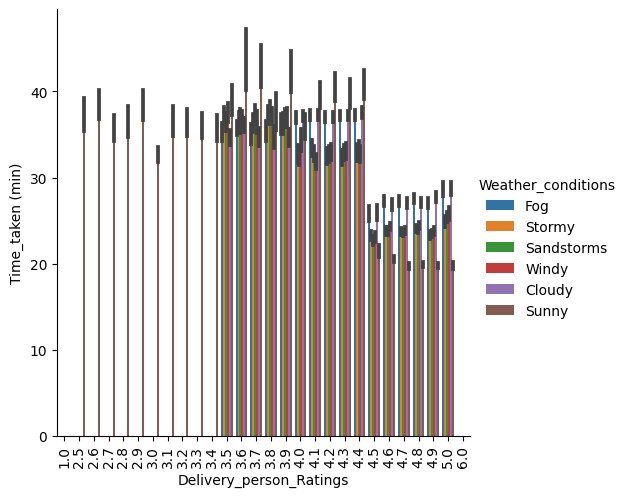

In [304]:
plt.figure(figsize=(10,10))
sns.catplot(data=df, x="Delivery_person_Ratings", y="Time_taken (min)", hue="Weather_conditions", kind="bar")
plt.xticks(rotation= 90)
plt.show()

In [385]:
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,19.750000,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,29.384615,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,26.564103,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,22.466667,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,23.538462,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


e:\Working\complete_task_25_aug\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


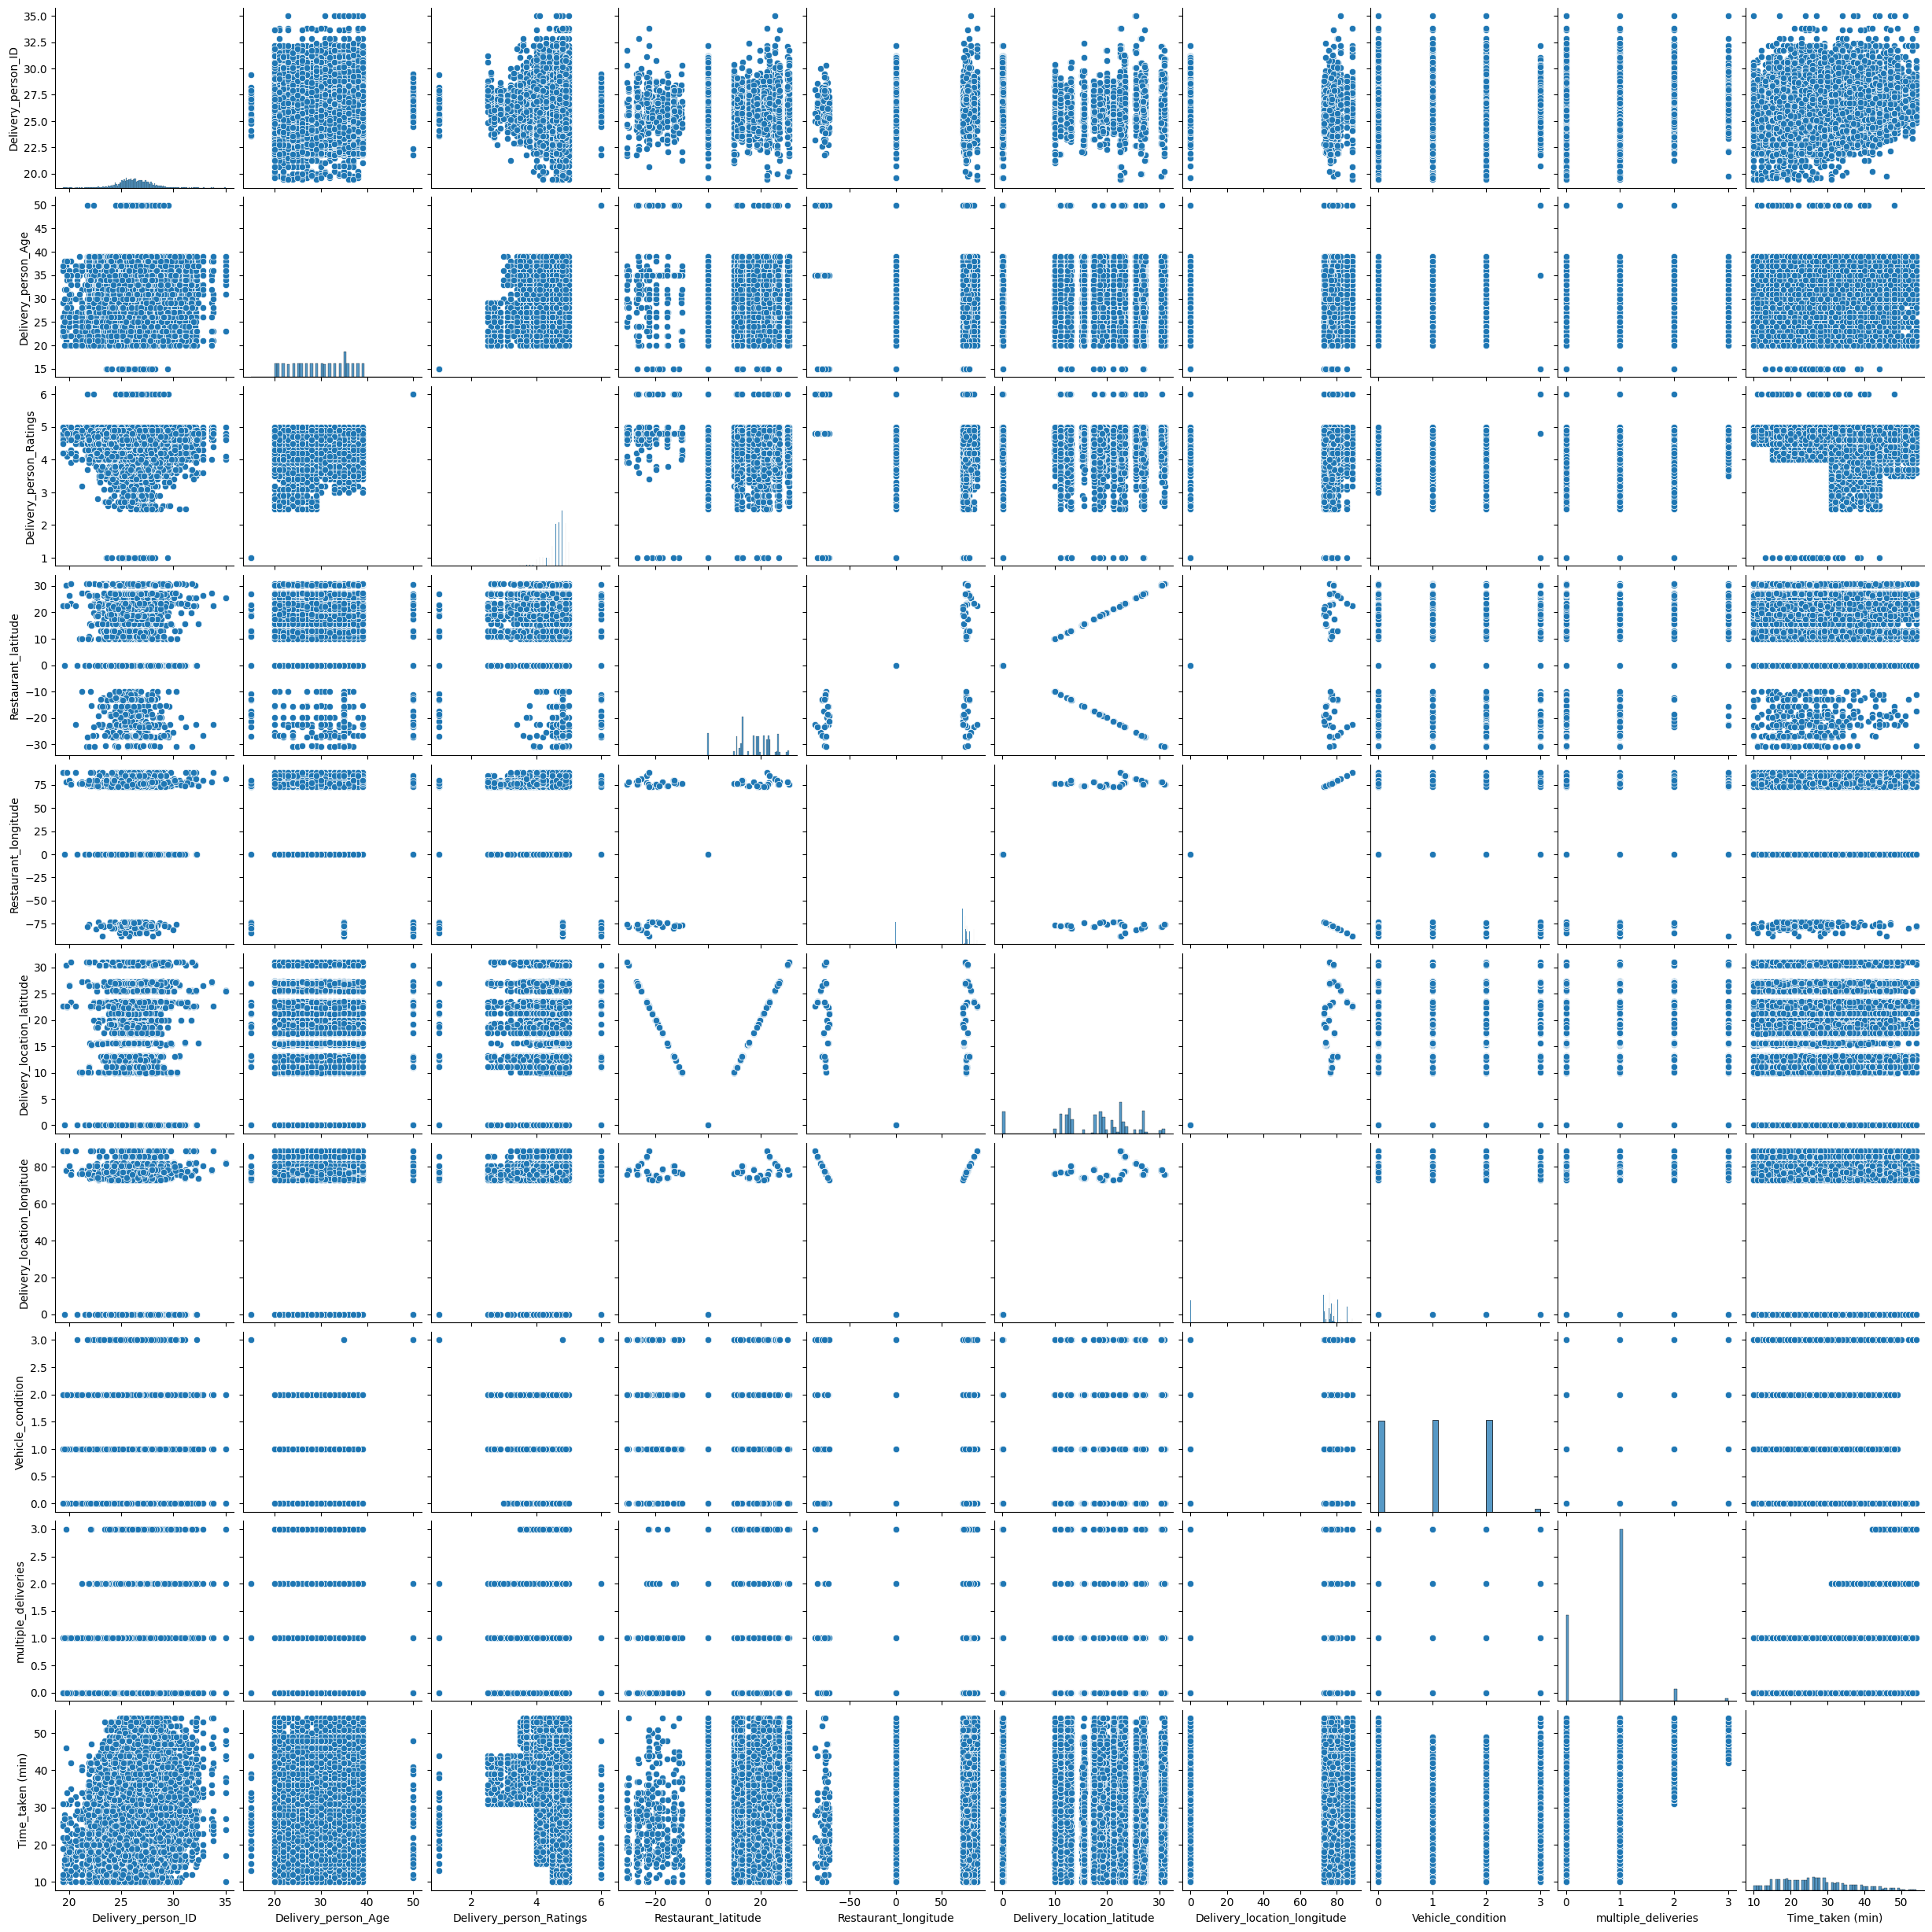

In [144]:
sns.pairplot(df)

In [386]:
# Assuming 'df' is your DataFrame
numeric_columns = df.select_dtypes(exclude='object')
correlation_matrix = numeric_columns.corr()


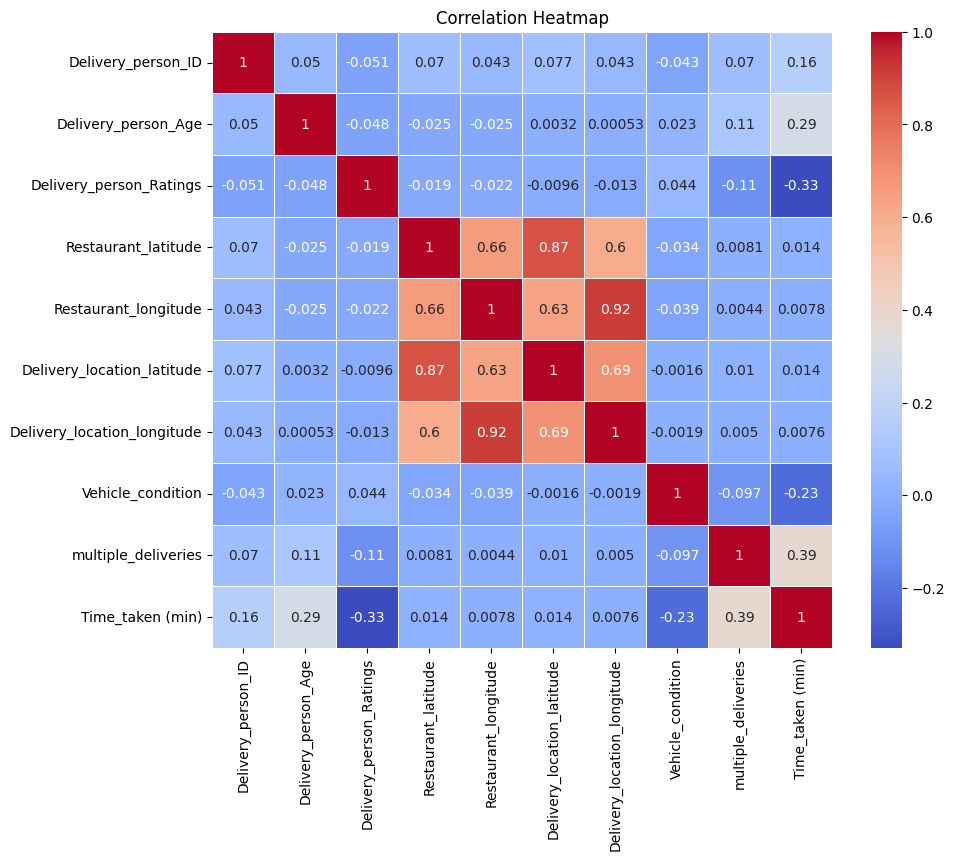

In [387]:
# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [388]:
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,19.750000,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,29.384615,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,26.564103,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,22.466667,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,23.538462,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_ID           45584 non-null  float64
 1   Delivery_person_Age          45584 non-null  float64
 2   Delivery_person_Ratings      45584 non-null  float64
 3   Restaurant_latitude          45584 non-null  float64
 4   Restaurant_longitude         45584 non-null  float64
 5   Delivery_location_latitude   45584 non-null  float64
 6   Delivery_location_longitude  45584 non-null  float64
 7   Order_Date                   45584 non-null  object 
 8   Time_Orderd                  43853 non-null  object 
 9   Time_Order_picked            45584 non-null  object 
 10  Weather_conditions           44968 non-null  object 
 11  Road_traffic_density         44983 non-null  object 
 12  Vehicle_condition            45584 non-null  int64  
 13  Type_of_order   

Order_Date                   

In [390]:
df['Order_Date'].value_counts()

Order_Date
15-03-2022    1192
03-04-2022    1178
13-03-2022    1169
26-03-2022    1165
24-03-2022    1162
09-03-2022    1159
05-04-2022    1156
05-03-2022    1154
07-03-2022    1153
03-03-2022    1150
21-03-2022    1149
11-03-2022    1148
19-03-2022    1148
30-03-2022    1141
01-03-2022    1140
28-03-2022    1139
17-03-2022    1134
01-04-2022    1133
02-03-2022    1012
10-03-2022     996
16-03-2022     995
20-03-2022     993
02-04-2022     992
06-03-2022     986
04-03-2022     980
29-03-2022     977
25-03-2022     974
14-03-2022     973
11-02-2022     970
18-03-2022     968
31-03-2022     967
27-03-2022     965
08-03-2022     964
12-03-2022     964
23-03-2022     964
06-04-2022     961
13-02-2022     957
15-02-2022     945
04-04-2022     941
17-02-2022     939
12-02-2022     864
16-02-2022     861
18-02-2022     855
14-02-2022     851
Name: count, dtype: int64

In [391]:
df['Order_Date'].isna().sum()

0

In [392]:
df['Order_day']=df['Order_Date'].str.split('-').str[0]
df['Order_month']=df['Order_Date'].str.split('-').str[1]
df['Order_year']=df['Order_Date'].str.split('-').str[2]

In [393]:
df.drop('Order_Date',axis=1,inplace=True)

In [394]:
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,...,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Order_day,Order_month,Order_year
0,19.750000,36.0,4.2,30.327968,78.046106,30.397968,78.116106,21:55,22:10,Fog,...,2,Snack,motorcycle,3.0,No,Metropolitian,46,12,02,2022
1,29.384615,21.0,4.7,10.003064,76.307589,10.043064,76.347589,14:55,15:05,Stormy,...,1,Meal,motorcycle,1.0,No,Metropolitian,23,13,02,2022
2,26.564103,23.0,4.7,18.562450,73.916619,18.652450,74.006619,17:30,17:40,Sandstorms,...,1,Drinks,scooter,1.0,No,Metropolitian,21,04,03,2022
3,22.466667,34.0,4.3,30.899584,75.809346,30.919584,75.829346,09:20,09:30,Sandstorms,...,0,Buffet,motorcycle,0.0,No,Metropolitian,20,13,02,2022
4,23.538462,24.0,4.7,26.463504,80.372929,26.593504,80.502929,19:50,20:05,Fog,...,1,Snack,scooter,1.0,No,Metropolitian,41,14,02,2022


In [458]:
df['Order_day']=df['Order_day'].astype(int)
df['Order_month']=df['Order_month'].astype(int)
df['Order_year']=df['Order_year'].astype(int)



Time_Orderd

In [395]:
df['Time_Orderd'].isna().sum()

1731

In [396]:
my_list = []
for i in df['Time_Orderd'].str.split(':').str[0].unique().astype(float):
    #print(i)
    if i <= 1:
        print(i)
        my_list.append(i)

0.458333333
0.958333333
0.791666667
0.875
1.0
0.375
0.625
0.833333333
0.666666667
0.75
0.416666667
0.916666667
0.5
0.708333333
0.541666667
0.583333333


In [397]:
df[df['Time_Orderd']=="0.583333333"]

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,...,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Order_day,Order_month,Order_year
1065,28.155172,39.0,4.7,21.175975,72.795503,21.215975,72.835503,0.583333333,14:15,Windy,...,2,Meal,scooter,1.0,No,Metropolitian,29,11,03,2022
2770,27.000000,33.0,4.7,19.131141,72.813074,19.171140,72.853074,0.583333333,14:10,Cloudy,...,0,Snack,motorcycle,1.0,No,Metropolitian,26,09,03,2022
3960,27.300000,20.0,4.9,12.323225,76.630028,12.363225,76.670028,0.583333333,14:10,Windy,...,0,Drinks,motorcycle,1.0,No,Metropolitian,31,13,03,2022
5043,21.928571,28.0,4.8,0.000000,0.000000,0.040000,0.040000,0.583333333,14:10,Sunny,...,2,Buffet,scooter,0.0,No,Urban,15,11,02,2022
5640,24.838710,33.0,4.8,13.064181,80.236442,13.104181,80.276442,0.583333333,14:15,Windy,...,2,Meal,scooter,1.0,No,Metropolitian,27,07,03,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40661,25.230769,24.0,4.9,23.234631,77.401663,23.274631,77.441663,0.583333333,14:05,Stormy,...,0,Snack,motorcycle,0.0,No,Metropolitian,30,11,02,2022
41817,26.370370,32.0,5.0,13.005801,80.250744,13.045801,80.290744,0.583333333,14:10,Sandstorms,...,1,Drinks,scooter,1.0,No,Urban,32,24,03,2022
44113,24.444444,38.0,4.7,18.543626,73.905101,18.583626,73.945101,0.583333333,14:15,Sandstorms,...,1,Meal,motorcycle,0.0,No,Urban,32,28,03,2022
44133,27.169811,20.0,4.1,26.956431,75.776649,26.996431,75.816649,0.583333333,14:05,Fog,...,1,Drinks,scooter,1.0,No,Urban,33,01,04,2022


In [398]:
df[df['Time_Order_picked']=="0.583333333"]

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,...,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Order_day,Order_month,Order_year
1787,27.406780,33.0,4.8,22.311844,73.165081,22.351844,73.205081,13:50,0.583333333,Fog,...,0,Drinks,motorcycle,1.0,No,Metropolitian,26,19,03,2022
2157,25.672414,37.0,4.2,21.185047,72.808590,21.225047,72.848590,13:55,0.583333333,Windy,...,2,Drinks,motorcycle,1.0,No,Metropolitian,31,09,03,2022
2656,25.950000,26.0,4.9,13.058616,80.264151,13.098616,80.304151,13:55,0.583333333,Stormy,...,0,Buffet,motorcycle,1.0,No,Urban,30,11,03,2022
2847,28.517241,30.0,4.7,17.483216,78.552111,17.523216,78.592111,13:55,0.583333333,Sunny,...,2,Drinks,scooter,0.0,No,Metropolitian,21,28,03,2022
3001,25.142857,33.0,4.6,19.103249,72.846749,19.143249,72.886749,13:50,0.583333333,Stormy,...,2,Drinks,motorcycle,1.0,No,Urban,26,05,04,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44749,26.466667,20.0,4.7,23.214294,77.435361,23.254294,77.475361,13:45,0.583333333,Sunny,...,1,Drinks,scooter,1.0,No,Urban,12,17,02,2022
44765,26.355932,26.0,4.6,0.000000,0.000000,0.040000,0.040000,13:45,0.583333333,Windy,...,1,Meal,scooter,NaN,No,Metropolitian,17,30,03,2022
45093,27.885246,36.0,4.8,22.745049,75.892471,22.785049,75.932471,13:50,0.583333333,Fog,...,2,Snack,scooter,1.0,No,Metropolitian,26,19,03,2022
45293,27.525424,34.0,4.4,12.933284,77.615428,12.973284,77.655428,13:50,0.583333333,Fog,...,0,Buffet,motorcycle,1.0,No,Metropolitian,31,05,03,2022


In [399]:
my_list

[0.458333333,
 0.958333333,
 0.791666667,
 0.875,
 1.0,
 0.375,
 0.625,
 0.833333333,
 0.666666667,
 0.75,
 0.416666667,
 0.916666667,
 0.5,
 0.708333333,
 0.541666667,
 0.583333333]

In [400]:
my_dict = {
"0.458333333" : "11:00",
"0.958333333" : "23:00",
"0.791666667" : "19:00",
"0.875" : "21:00",
"1" : "24:00",
"0.375" : "9:00",
"0.625" : "13:00",
"0.833333333" : "20:00",
"0.666666667" : "16:00",
"0.75" : "18:00",
"0.416666667" : "10:00",
"0.916666667" : "22:00",
"0.5" : "12:00",
"0.708333333": "17:00",
"0.541666667": "13:00",
"0.583333333": "14:00"}

In [401]:
df['Time_Orderd']=df['Time_Orderd'].replace(my_dict)

In [402]:
df['Time_Orderd'].unique()

array(['21:55', '14:55', '17:30', '09:20', '19:50', '20:25', '20:30',
       '20:40', '21:15', '20:20', '22:30', '08:15', '19:30', '12:25',
       '18:35', '20:35', '23:20', '21:20', '23:35', '22:35', '23:25',
       '13:35', '21:35', '18:55', '14:15', '11:00', '09:45', '08:40',
       '23:00', '17:25', nan, '19:45', '19:10', '10:55', '21:40', '19:00',
       '16:45', '11:30', '15:10', '22:45', '22:10', '20:45', '22:50',
       '17:55', '09:25', '20:15', '22:25', '22:40', '23:50', '15:25',
       '10:20', '20:55', '10:40', '15:55', '20:10', '12:10', '15:30',
       '10:35', '21:10', '20:50', '12:35', '21:00', '23:40', '18:15',
       '18:20', '11:45', '12:45', '23:30', '10:50', '21:25', '10:10',
       '17:50', '22:20', '12:40', '23:55', '10:25', '08:45', '23:45',
       '19:55', '22:15', '23:10', '09:15', '18:25', '18:45', '16:50',
       '24:00', '14:20', '10:15', '08:50', '9:00', '17:45', '16:35',
       '08:30', '21:45', '19:40', '14:50', '18:10', '12:20', '12:50',
       '09:10', 

In [419]:
df.dropna(subset=['Time_Orderd'],inplace=True)

In [420]:
df.shape

(43853, 21)

In [429]:
df['Time_Orderd']

0        21:55
1        14:55
2        17:30
3        09:20
4        19:50
         ...  
45579    11:35
45580    19:55
45581    23:50
45582    13:35
45583    17:10
Name: Time_Orderd, Length: 43853, dtype: object

In [432]:
df['Time_Orderd']=df['Time_Orderd'].str.split(":").str[0].astype(int)*60 + df['Time_Orderd'].str.split(":").str[1].astype(int)

In [433]:
df['Time_Orderd']

0        1315
1         895
2        1050
3         560
4        1190
         ... 
45579     695
45580    1195
45581    1430
45582     815
45583    1030
Name: Time_Orderd, Length: 43853, dtype: int32

Time_Order_picked

In [405]:
df['Time_Order_picked']=df['Time_Order_picked'].replace(my_dict)

In [406]:
df['Time_Order_picked'].unique()

array(['22:10', '15:05', '17:40', '09:30', '20:05', '20:35', '15:10',
       '20:40', '20:50', '21:30', '20:25', '22:45', '08:30', '19:45',
       '12:30', '18:50', '23:30', '21:35', '23:45', '22:50', '22:40',
       '23:35', '13:40', '21:45', '19:10', '14:25', '11:10', '09:55',
       '08:55', '23:10', '17:30', '18:35', '19:50', '19:25', '11:00',
       '19:15', '16:55', '11:40', '15:15', '22:55', '22:25', '20:55',
       '23:05', '18:00', '23:00', '09:40', '20:20', '22:35', '22:00',
       '23:55', '15:40', '10:30', '21:00', '10:50', '16:05', '20:15',
       '12:15', '15:45', '22:15', '10:45', '15:30', '24:05:00', '21:25',
       '12:45', '21:15', '18:20', '18:25', '11:50', '12:50', '10:55',
       '21:40', '10:20', '17:55', '23:50', '12:55', '24:10:00', '10:40',
       '9:00', '20:45', '20:00', '23:15', '22:20', '21:05', '17:00',
       '24:15:00', '21:20', '14:35', '10:25', '09:05', '16:50', '08:40',
       '23:40', '21:50', '19:55', '13:00', '10:35', '09:25', '17:20',
       '19:3

In [440]:
df['Time_Order_picked']=df['Time_Order_picked'].str.split(":").str[0].astype(int) * 60 + df['Time_Order_picked'].str.split(":").str[1].astype(int)

In [441]:
df['Time_Order_picked']

0        1330
1         905
2        1060
3         570
4        1205
         ... 
45579     705
45580    1210
45581    1445
45582     820
45583    1035
Name: Time_Order_picked, Length: 43853, dtype: int32

In [455]:
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,...,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Order_day,Order_month,Order_year
0,19.750000,36.0,4.2,30.327968,78.046106,30.397968,78.116106,1315,1330,Fog,...,2,Snack,motorcycle,3.0,No,Metropolitian,46,12,02,2022
1,29.384615,21.0,4.7,10.003064,76.307589,10.043064,76.347589,895,905,Stormy,...,1,Meal,motorcycle,1.0,No,Metropolitian,23,13,02,2022
2,26.564103,23.0,4.7,18.562450,73.916619,18.652450,74.006619,1050,1060,Sandstorms,...,1,Drinks,scooter,1.0,No,Metropolitian,21,04,03,2022
3,22.466667,34.0,4.3,30.899584,75.809346,30.919584,75.829346,560,570,Sandstorms,...,0,Buffet,motorcycle,0.0,No,Metropolitian,20,13,02,2022
4,23.538462,24.0,4.7,26.463504,80.372929,26.593504,80.502929,1190,1205,Fog,...,1,Snack,scooter,1.0,No,Metropolitian,41,14,02,2022


In [459]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43853 entries, 0 to 45583
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_ID           43853 non-null  float64
 1   Delivery_person_Age          43853 non-null  float64
 2   Delivery_person_Ratings      43853 non-null  float64
 3   Restaurant_latitude          43853 non-null  float64
 4   Restaurant_longitude         43853 non-null  float64
 5   Delivery_location_latitude   43853 non-null  float64
 6   Delivery_location_longitude  43853 non-null  float64
 7   Time_Orderd                  43853 non-null  int32  
 8   Time_Order_picked            43853 non-null  int32  
 9   Weather_conditions           43853 non-null  object 
 10  Road_traffic_density         43853 non-null  object 
 11  Vehicle_condition            43853 non-null  int64  
 12  Type_of_order                43853 non-null  object 
 13  Type_of_vehicle      

Weather_conditions

In [461]:
df['Weather_conditions'].unique()

array(['Fog', 'Stormy', 'Sandstorms', 'Windy', 'Cloudy', 'Sunny'],
      dtype=object)

In [462]:
df['Weather_conditions'].isna().sum()

0

In [463]:
df['Weather_conditions'].value_counts()

Weather_conditions
Fog           7475
Stormy        7400
Cloudy        7336
Sandstorms    7284
Windy         7251
Sunny         7107
Name: count, dtype: int64

In [475]:
df['Weather_conditions'].value_counts().sort_values().index

Index(['Sunny', 'Windy', 'Sandstorms', 'Cloudy', 'Stormy', 'Fog'], dtype='object', name='Weather_conditions')

In [477]:
weather_dict={'Sunny':1, 'Windy':2, 'Sandstorms':3, 'Cloudy':4, 'Stormy':5, 'Fog':6}

In [479]:
df['Weather_conditions']=df['Weather_conditions'].map(weather_dict)

In [481]:
df['Weather_conditions']=df['Weather_conditions'].astype(int)

Road_traffic_density

In [484]:
df['Road_traffic_density'].value_counts()

Road_traffic_density
Low       15061
Jam       13796
Medium    10676
High       4320
Name: count, dtype: int64

In [485]:
df['Road_traffic_density'].isna().sum()

0

In [491]:
traffic_list=df.groupby(['Road_traffic_density'])['Time_taken (min)'].mean().sort_values().index

In [492]:
traffic_list

Index(['Low', 'Medium', 'High', 'Jam'], dtype='object', name='Road_traffic_density')

In [493]:
traffic_rank = [1,2,3,4]

In [494]:
dict(zip(traffic_list,traffic_rank))

{'Low': 1, 'Medium': 2, 'High': 3, 'Jam': 4}

In [498]:
df['Road_traffic_density'] = df['Road_traffic_density'].map(dict(zip(traffic_list,traffic_rank)))

In [501]:
df['Road_traffic_density'].dtypes

dtype('int64')

Type_of_order

In [508]:
type_order_list=df['Type_of_order'].value_counts().sort_values().index

In [509]:
type_order_rank = np.arange(1,5)

In [510]:
dict(zip(type_order_list,type_order_rank))

{'Buffet': 1, 'Drinks': 2, 'Meal': 3, 'Snack': 4}

In [512]:
df['Type_of_order']=df['Type_of_order'].map(dict(zip(type_order_list,type_order_rank)))

In [514]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43853 entries, 0 to 45583
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_ID           43853 non-null  float64
 1   Delivery_person_Age          43853 non-null  float64
 2   Delivery_person_Ratings      43853 non-null  float64
 3   Restaurant_latitude          43853 non-null  float64
 4   Restaurant_longitude         43853 non-null  float64
 5   Delivery_location_latitude   43853 non-null  float64
 6   Delivery_location_longitude  43853 non-null  float64
 7   Time_Orderd                  43853 non-null  int32  
 8   Time_Order_picked            43853 non-null  int32  
 9   Weather_conditions           43853 non-null  int32  
 10  Road_traffic_density         43853 non-null  int64  
 11  Vehicle_condition            43853 non-null  int64  
 12  Type_of_order                43853 non-null  int32  
 13  Type_of_vehicle      

Type_of_vehicle

In [516]:
df['Type_of_vehicle'].value_counts()

Type_of_vehicle
motorcycle          25627
scooter             14692
electric_scooter     3534
Name: count, dtype: int64

In [517]:
df['Type_of_vehicle'].isna().sum()

0

In [520]:
vehicle_list=df['Type_of_vehicle'].value_counts().sort_values().index

In [521]:
vehical_rank = np.arange(1,4)

In [523]:
dict(zip(vehicle_list,vehical_rank))

{'electric_scooter': 1, 'scooter': 2, 'motorcycle': 3}

In [524]:
df['Type_of_vehicle']=df['Type_of_vehicle'].map(dict(zip(vehicle_list,vehical_rank)))

multiple_deliveries

In [527]:
df['multiple_deliveries'].isna().sum()

943

In [528]:
df[df['multiple_deliveries'].isnull()]

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,...,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Order_day,Order_month,Order_year
8,26.947368,34.0,4.9,17.426228,78.407495,17.496228,78.477495,1240,1250,4,...,0,4,3,NaN,No,Metropolitian,41,20,3,2022
77,25.509091,39.0,4.8,18.516216,73.842527,18.566216,73.892527,1315,1330,5,...,1,3,3,NaN,No,Metropolitian,28,3,3,2022
86,23.806452,25.0,5.0,21.160437,72.774209,21.270437,72.884209,1225,1240,5,...,1,3,3,NaN,No,Metropolitian,15,18,3,2022
126,25.303571,28.0,4.8,12.939496,77.625999,12.989496,77.675999,1390,1395,6,...,1,2,3,NaN,No,Metropolitian,18,24,3,2022
135,26.190476,29.0,4.6,21.171060,72.789292,21.251060,72.869292,1180,1195,1,...,2,3,1,NaN,No,Metropolitian,17,12,3,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45038,25.616667,36.0,4.8,0.000000,0.000000,0.020000,0.020000,495,510,1,...,1,4,2,NaN,No,Urban,15,11,3,2022
45066,25.472222,23.0,4.7,0.000000,0.000000,0.090000,0.090000,1400,1415,3,...,2,4,2,NaN,No,Urban,17,31,3,2022
45071,25.175000,29.0,4.6,13.064181,80.236442,13.094181,80.266442,1060,1075,6,...,1,2,2,NaN,No,Urban,15,3,3,2022
45142,23.754386,22.0,4.8,22.651847,75.881991,22.701847,75.931991,1245,1260,5,...,1,4,2,NaN,No,Urban,14,28,3,2022


In [536]:
df.groupby(['multiple_deliveries'])['Time_taken (min)'].value_counts()

multiple_deliveries  Time_taken (min)
0.0                  15                  824
                     16                  741
                     17                  667
                     18                  648
                     19                  630
                                        ... 
3.0                  45                   19
                     51                   17
                     42                   13
                     52                   13
                     50                   10
Name: count, Length: 127, dtype: int64

In [543]:
df['multiple_deliveries'].fillna(1.0,inplace=True)

In [544]:
df['multiple_deliveries'].mode()

0    1.0
Name: multiple_deliveries, dtype: float64

In [545]:
df['multiple_deliveries'].value_counts()

multiple_deliveries
1.0    28003
0.0    13587
2.0     1920
3.0      343
Name: count, dtype: int64

Festival

In [549]:
df['Festival'].value_counts()

Festival
No     42777
Yes      857
Name: count, dtype: int64

In [550]:
df['Festival'].isna().sum()

219

In [553]:
df[df['Festival']=='No']

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,...,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Order_day,Order_month,Order_year
0,19.750000,36.0,4.2,30.327968,78.046106,30.397968,78.116106,1315,1330,6,...,2,4,3,3.0,No,Metropolitian,46,12,2,2022
1,29.384615,21.0,4.7,10.003064,76.307589,10.043064,76.347589,895,905,5,...,1,3,3,1.0,No,Metropolitian,23,13,2,2022
2,26.564103,23.0,4.7,18.562450,73.916619,18.652450,74.006619,1050,1060,3,...,1,2,2,1.0,No,Metropolitian,21,4,3,2022
3,22.466667,34.0,4.3,30.899584,75.809346,30.919584,75.829346,560,570,3,...,0,1,3,0.0,No,Metropolitian,20,13,2,2022
4,23.538462,24.0,4.7,26.463504,80.372929,26.593504,80.502929,1190,1205,6,...,1,4,2,1.0,No,Metropolitian,41,14,2,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,26.066667,30.0,4.8,26.902328,75.794257,26.912328,75.804257,695,705,2,...,1,3,3,0.0,No,Metropolitian,32,24,3,2022
45580,27.769231,21.0,4.6,0.000000,0.000000,0.070000,0.070000,1195,1210,2,...,0,1,3,1.0,No,Metropolitian,36,16,2,2022
45581,24.295455,30.0,4.9,13.022394,80.242439,13.052394,80.272439,1430,1445,4,...,1,2,2,0.0,No,Metropolitian,16,11,3,2022
45582,27.112903,20.0,4.7,11.001753,76.986241,11.041753,77.026241,815,820,4,...,0,4,3,1.0,No,Metropolitian,26,7,3,2022


In [555]:
df['Festival'].fillna("No",inplace=True)

In [556]:
df['Festival'].isna().sum()

0

In [558]:
festival_list=df['Festival'].value_counts().index

In [559]:
festival_rank = [0,1]

In [560]:
dict(zip(festival_list,festival_rank))

{'No': 0, 'Yes': 1}

In [561]:
df['Festival']=df['Festival'].map(dict(zip(festival_list,festival_rank)))

City

In [563]:
df['City'].value_counts()

City
Metropolitian    32796
Urban             9757
Semi-Urban         156
Name: count, dtype: int64

In [564]:
df['City'].isna().sum()

1144

In [565]:
df['City'].fillna("Metropolitian",inplace=True)

In [568]:
city_list=df['City'].value_counts().sort_values().index

In [569]:
city_rank = np.arange(1,4)

In [574]:
dict(zip(city_list,np.arange(1,len(city_list)+1)))

{'Semi-Urban': 1, 'Urban': 2, 'Metropolitian': 3}

In [576]:
df['City']=df['City'].map(dict(zip(city_list,np.arange(1,len(city_list)+1))))

In [577]:
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,...,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Order_day,Order_month,Order_year
0,19.750000,36.0,4.2,30.327968,78.046106,30.397968,78.116106,1315,1330,6,...,2,4,3,3.0,0,3,46,12,2,2022
1,29.384615,21.0,4.7,10.003064,76.307589,10.043064,76.347589,895,905,5,...,1,3,3,1.0,0,3,23,13,2,2022
2,26.564103,23.0,4.7,18.562450,73.916619,18.652450,74.006619,1050,1060,3,...,1,2,2,1.0,0,3,21,4,3,2022
3,22.466667,34.0,4.3,30.899584,75.809346,30.919584,75.829346,560,570,3,...,0,1,3,0.0,0,3,20,13,2,2022
4,23.538462,24.0,4.7,26.463504,80.372929,26.593504,80.502929,1190,1205,6,...,1,4,2,1.0,0,3,41,14,2,2022


In [578]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43853 entries, 0 to 45583
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_ID           43853 non-null  float64
 1   Delivery_person_Age          43853 non-null  float64
 2   Delivery_person_Ratings      43853 non-null  float64
 3   Restaurant_latitude          43853 non-null  float64
 4   Restaurant_longitude         43853 non-null  float64
 5   Delivery_location_latitude   43853 non-null  float64
 6   Delivery_location_longitude  43853 non-null  float64
 7   Time_Orderd                  43853 non-null  int32  
 8   Time_Order_picked            43853 non-null  int32  
 9   Weather_conditions           43853 non-null  int32  
 10  Road_traffic_density         43853 non-null  int64  
 11  Vehicle_condition            43853 non-null  int64  
 12  Type_of_order                43853 non-null  int32  
 13  Type_of_vehicle      

In [579]:

df.isna().sum()

Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Time_Orderd                    0
Time_Order_picked              0
Weather_conditions             0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken (min)               0
Order_day                      0
Order_month                    0
Order_year                     0
dtype: int64

<Axes: >

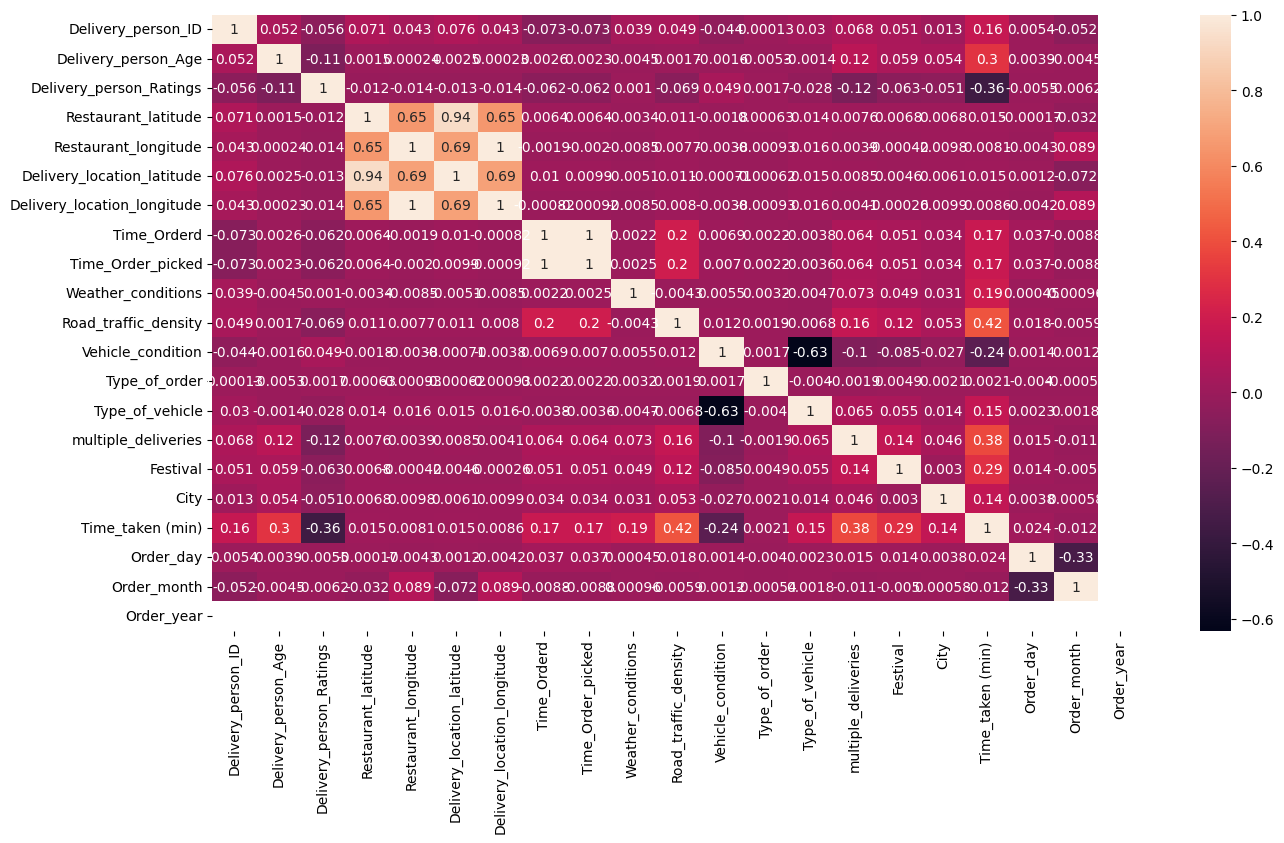

In [582]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)